# Çizgi Grafik - Line Plot

- diğer grafiklere göre daha zor problemlerde kullanacak olduğumuz bir veri görselleştirme türüdür.
- zamana bağlı değişkenlerin olduğu veri setlerinde ve nesnelerin interneti gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanabileceğimiz bir veri görselleştirme tekniğidir.

In [1]:
import seaborn as sns

In [2]:
fmri=sns.load_dataset("fmri")

In [3]:
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


**beyne bağlanan bir cihaz aracılığıyla toplanan sinyalleri ifade eden veri seti**
- subject: verilerin toplandığı kişiler
- timepoint: zaman noktalarını ifade ediyor
- event: bu verinin toplanmasıyla ilgili olay
- region: sinyalin toplandığı bölgeyi ifade eder
- signal: gelen sinyali ifade eder.

In [4]:
df.shape # 1064 tane gözlem birimi, 5 tane değişken
# 3 tane değişken kategorik, 2 tanesi ise sayısal(timepoint, signal)

(1064, 5)

- buradaki timepoint değişkeni kesikli bir sayısal değişkendir. kategorik değişken muamelesi görebilir. zaman noktalarını mutlak olarak ifade eder.
- sinyallerin ölçümleri üzerinden bazı farklılıkların yakalanması amaçlanır.
- amacımız buradaki her bir timepoint yani zaman noktasına göre signal'in durumunu gözlemlemek olsun ve sonrasında çaprazlama işlemleriyle birlikte de buradaki diğer değişkenleri boyut olarak veri setin ekleyelim.

In [6]:
df["timepoint"].describe()
# standart sapma dışında hiçbir ondalıklı değer yoktur. 
# bu da timepoint değişkeninin kesikli olduğu anlamına gelir.
# mutlak bir değere sahip olduğu anlamına gelir 
# bunlar istenirse kategorik değişkenmiş gibi değerlendirilebilir.

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [8]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [10]:
# her bir zaman noktasında eşit sayıda sinyal mı var?
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

- her bir zaman noktasında eşit sayıda sinyal toplanmış.
- her bir zaman noktasında 56 tane sinyal varsa dolayısıyla bu sinyallerinde birbirinden farklı değerlere sahip olmasını, eşsiz olmasını bekleriz.

In [12]:
df.groupby("signal").count()
# zaten bu veri seti içerisinde 1064 tane gözlem vardı.
# sinyal gruplandığında grup sayısı 1064'e eşit olduğundan
# buradan her birisinin tekil olduğu bilgisine erişmiş olduk

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [13]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


**zaman noktalarına göre betimsel istatistikler**
- birbirinden farklı standart sapmalar var demek ki ortalama etrafındaki durumlar birbirlerine göre değişebiliyor demek ki bu değişimide oluşturan bazı yapılar var işte biz bu yapıları bir arada anlamaya çalışacağız
- standart sapmalar genellikle birbirlerine yakındır ama bazılarında birbirinden oldukça uzaklaşmıştır. bu da arka tarafta bir bilgi taşıdığını gösterir ve farklı değişkenlerce açıklanabilir.

# Çizgi Grafik ve Çaprazlamalar

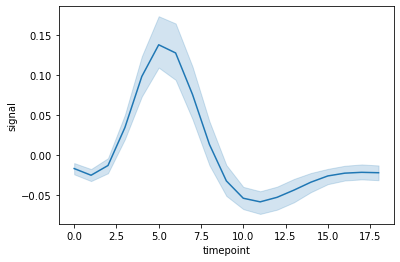

In [14]:
sns.lineplot(x="timepoint", y="signal", data=df);

- zaman noktalarına göre sinyallerin artış ve azalışıyla ilgili bir bilgi sunulmuş.
- seaborn kütüphanesi toplulaştırılmış işlemler yapar.
- koyu mavi, ortalama değerlere karşılık gelir. her birisinde 54 tane gözlem vardı. bu durumda bu gözlemlerin ortalamasıdır.
- daha açık mavi ise, standart sapmalarıdır. güven aralıklarını ifade eder. bunlar bazı noktalarda daralmış bazı noktalarda ise genişlemiştir. bu da bazı noktalarda sinyallerin daraldığını bazı noktalarda ise arttığını ifade eder.
- her bir zaman noktasından 56 tane sinyal gözlemlenmişti. dolayısıyla her bir zaman noktasında 56 değer vardır. bu 56 tane değer farklı farklı kişilere aittir. bu kişilerin her bir zaman noktasında üretmiş olduğu sinyallerin ortalamaları mavi çizgi, standart sapmaları göz önünde bulundurularak oluşturulan aralıklar(açık mavi) ise güven aralıklarıdır.

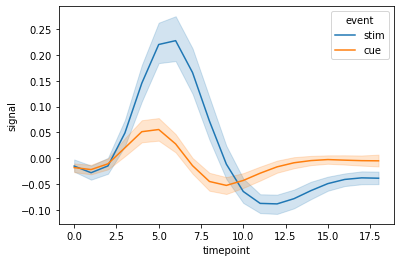

In [16]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=df);

- grafikte uçlarda sıçrama yapan, çıkıntı gibi gözüken noktalarını oluşturan şey bir kategorik değişken eklenerek daha açıklanabilir bir hal aldı.
- event'i eklediğimizde yukarıdaki ve aşağıdaki tepe noktasını event türü stim olan kategorik değişkenin etkilediğini görüyoruz.

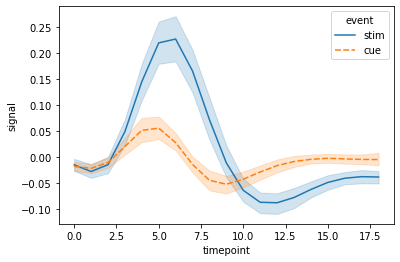

In [17]:
sns.lineplot(x="timepoint", y="signal",hue="event",style="event",data=df);

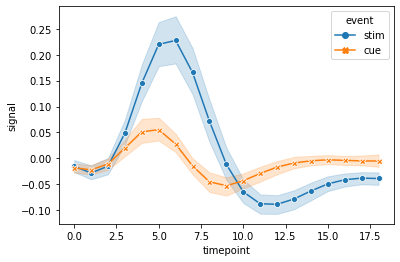

In [18]:
# ortalamayı ifade eden noktaları belirginleştirelim.
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True,
             dashes=False,
             data=df);
# ortalama değerleri işaretler

- ortalama noktaları birbirinden farklı şekillerle işaretlenmiş oldu. 

- markers: Bu parametre "True" olarak ayarlanmış, yani çizgilerde işaretçiler gösterilecek. Her bir çizgi üzerindeki her veri noktası bir işaretçi ile gösterilecek.
- dashes: "dashes" parametresi "False" olarak ayarlanmış, bu da çizgilerin sürekli çizgi şeklinde olacağı anlamına gelir, kesikli çizgiler olmayacaktır.

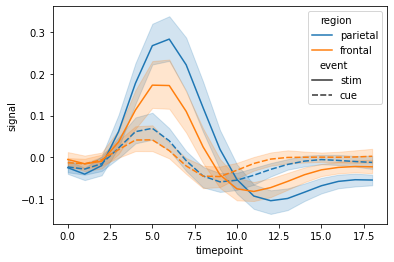

In [19]:
# bir boyut daha ekleyelim
sns.lineplot(x="timepoint",
            y="signal",
            hue="region",
            style="event",
            data=df);